In [ ]:
#Project Overview:
#In this project my goal is to figure out if customer ratings and a customers willingness to pay have a direct correlation when applied to
#self help books. I got this idea because I noticed a huge range of costs for self help books and wondered what caused that difference.
#My project is going to focus on just a few factors and would not entirely encapsulate what would be needed to entirely understand the pricing
#assigned to these works. For example, date of release probably makes a huge difference on this front, but I found it very difficult to scrape
#that particular set of data because of relreleases or editions ect..
#I guess overall my project is a simple value versus cost analysis. Is it quality book buyers are willing to pay for or some other, or group of, factors?

In [1]:
#Dependencies: What modules will your project need?
#I modled some parts of my early stages of this project after a similiar project that was analyzing profitability margins in international best selling novels.
#The first thing that I had to do was open a new terminal and download beautifulsoup4 which was a little ticky as I do not use pip as so many internet
#sources suggest as I look for help online.
#I imported a number of things that I did not need and will go back and remove them later. As I run my code I find there is no downside
#to having imported things I don't use, so why not?
#I am going to leave it all up. I finally got my csv file to save with a non-empty dataset. Now that I will be using that as my data source
# I have no interest in messing with any of the code that got me to that point.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import time
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from urllib.request import urlopen
from bs4 import BeautifulSoup
import requests

In [33]:
#Collection: Where is your data coming from?
#Processing: How will you format and process your data?
#SO I decided to pullmy data from an internet scrape of the Amazon website.
#One of the first things I had to do was define my user agent to cloak my webscraping intentions. I remember doing this for the Twitter api scrape
#and while I am not sure it was necessary here because of my limited amount of scraping, it did not work until this step was included.
#My actual data request became a real headache and it took me a long time to figure out what the problem was. I turns out I just need to be
#thinking more about the systems I am interacting with. The selfhelp book toplist is updated every hour and subsequently so is its url. While
#I now know this and can act accordingly as I progress through my program, I was unable how to fix this issue where my program could automatically
#account for the problem. As a result I have to go an change the request once changed..(Follow up. This is no longer an issue once a csv file is created
# and then used as the data source)
#Once my data retrevial problem was sorted out I used a for loop to find the data categories I wished to use and a series of if else statments to 
#build a dataset for each category.
no_pages = 2

def get_data(pageNo):  
    headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}

    r = requests.get('https://www.amazon.com/Best-Sellers-Books-Self-Help/zgbs/books/4736/ref=zg_bs_'+str(pageNo)+'?ie=UTF8&pg='+str(pageNo), headers=headers)#, proxies=proxies)
    content = r.content
    soup = BeautifulSoup(content)
    #print(soup)

    alls = []
    for d in soup.findAll('div', attrs={'class':'a-section a-spacing-none aok-relative'}):
        #print(d)
        name = d.find('span', attrs={'class':'zg-text-center-align'})
        n = name.find_all('img', alt=True)
        #print(n[0]['alt'])
        author = d.find('a', attrs={'class':'a-size-small a-link-child'})
        rating = d.find('span', attrs={'class':'a-icon-alt'})
        users_rated = d.find('a', attrs={'class':'a-size-small a-link-normal'})
        price = d.find('span', attrs={'class':'p13n-sc-price'})

        all1=[]

        if name is not None:
            #print(n[0]['alt'])
            all1.append(n[0]['alt'])
        else:
            all1.append("unknown-product")

        if author is not None:
            #print(author.text)
            all1.append(author.text)
        elif author is None:
            author = d.find('span', attrs={'class':'a-size-small a-color-base'})
            if author is not None:
                all1.append(author.text)
            else:    
                all1.append('0')

        if rating is not None:
            #print(rating.text)
            all1.append(rating.text)
        else:
            all1.append('-1')

        if users_rated is not None:
            #print(price.text)
            all1.append(users_rated.text)
        else:
            all1.append('0')     

        if price is not None:
            #print(price.text)
            all1.append(price.text)
        else:
            all1.append('0')
        alls.append(all1)    
    return alls

In [36]:
#Processing: How will you format and process your data?
#After I got my csv file to properly save with a dataset that was not empty, I tried really hard to not go back and fiddle with any of
#the code before this point because the data was finally working for me and I was able to progress forward with the dataset I had created.
#Here I have organized my data and am sturcturing how it will be displayed
results = []
for i in range(1, no_pages+1):
    results.append(get_data(i))
flatten = lambda l: [item for sublist in l for item in sublist]
df = pd.DataFrame(flatten(results),columns=['Book Name','Author','Rating','Customers_Rated', 'Price'])
df.to_csv('selfhelp.csv', index=False, encoding='utf-8')

In [37]:
#Processing: How will you format and process your data?
#Here I am reading the dataframe that I have saved in a csv file and am printing it out to make sure it is structured the way I intended.
#This step was crucial because it let me know that I kept creating csv files with no data in them and directed me back up the pipeline to
#find where the problem was. Turns out it was so far up the pipeline that it was before the first line of code where my problem was.
df = pd.read_csv("selfhelp.csv")
df.shape
(100, 5)
df.head(61)

,Book Name,Author,Rating,Customers_Rated,Price
0,Atlas of the Heart: Mapping Meaningful Connect...,Brené Brown,4.4 out of 5 stars,25,$19.48
1,Atlas of the Heart: Mapping Meaningful Connect...,Brené Brown,4.4 out of 5 stars,25,0
2,Atomic Habits: An Easy & Proven Way to Build G...,James Clear,4.8 out of 5 stars,"56,404",$11.98
3,Atomic Habits: An Easy & Proven Way to Build G...,James Clear,4.8 out of 5 stars,"56,404",0
4,Greenlights,Matthew McConaughey,4.7 out of 5 stars,"47,621",0
5,Will,Will Smith,4.8 out of 5 stars,"1,231",$19.03
6,Wreck This Journal: Now in Color,Keri Smith,4.7 out of 5 stars,"17,148",$9.59
7,The Four Agreements: A Practical Guide to Pers...,Don Miguel Ruiz,4.7 out of 5 stars,"68,618",$5.77
8,"The Boy, the Mole, the Fox and the Horse",Charlie Mackesy,4.8 out of 5 stars,"86,738",$10.35
9,Crucible Leadership: Embrace Your Trials to Le...,Warwick Fairfax,5.0 out of 5 stars,15,$0.99


In [45]:
#Processing: How will you format and process your data?
#At this point I am not sure what visual representations I am going to want to use for sure, but what I know from all of the other
#dataframes from csv files I have worked with is that simplifying that data I have will make the data much more manageable and usable moving
#forward. Because of this, what I am going to try to do is reduce any data to an integer that can be reduced to an integer and still be
#a valuable datapoint.
#I only forced the price into an integer data type. 
#Basically in this section I am just replacing str data with nothing in order to get rid of commas and unwanted strings.
#I ran through this step many many times. When I finally got output that resembled what I wanted it to be I did not want to mess with the code
#further, but I do not fully understand the FutureWarning message I have received. I hope that it does not negatively affect my attempts
#at useful visual representations.


df['Rating'] = pd.to_numeric(df['Rating'])

df["Price"] = df["Price"].str.replace('$', '')

df["Price"] = df["Price"].str.replace(',', '')

df['Price'] = df['Price'].apply(lambda x: x.split('.')[0])

df['Price'] = df['Price'].astype(int)

df["Customers_Rated"] = df["Customers_Rated"].str.replace(',', '')

df['Customers_Rated'] = pd.to_numeric(df['Customers_Rated'], errors='ignore')

df.head()





C:\Users\HOMEPC~1\AppData\Local\Temp/ipykernel_7516/990423051.py:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Price"] = df["Price"].str.replace('$', '')


,Book Name,Author,Rating,Customers_Rated,Price
0,Atlas of the Heart: Mapping Meaningful Connect...,Brené Brown,4.4,25,19
1,Atlas of the Heart: Mapping Meaningful Connect...,Brené Brown,4.4,25,0
2,Atomic Habits: An Easy & Proven Way to Build G...,James Clear,4.8,56404,11
3,Atomic Habits: An Easy & Proven Way to Build G...,James Clear,4.8,56404,0
4,Greenlights,Matthew McConaughey,4.7,47621,0


In [46]:
#Processing: How will you format and process your data?
#In this step I am trying to get non-useful data points removed from my dataframe. Specifcally, values of zero.
#I did this by replacing zeroes with nans and then dropping the nans. My printout of the dataframe demonstrated a success.

df.replace(str(0), np.nan, inplace=True)
df.replace(0, np.nan, inplace=True)

df = df.dropna()

df.head()

,Book Name,Author,Rating,Customers_Rated,Price
0,Atlas of the Heart: Mapping Meaningful Connect...,Brené Brown,4.4,25,19.0
2,Atomic Habits: An Easy & Proven Way to Build G...,James Clear,4.8,56404,11.0
5,Will,Will Smith,4.8,1231,19.0
6,Wreck This Journal: Now in Color,Keri Smith,4.7,17148,9.0
7,The Four Agreements: A Practical Guide to Pers...,Don Miguel Ruiz,4.7,68618,5.0


In [48]:
#I believe my data has been processed to a point that I can now begin engaging in effective analysis.
#Analysis: What techniques will you use to understand your data?
#My intention is to use this dataframe to sort out which authors are producing the books that have the highest cost. Then to sort out which authors books
# have the highest ratings.  My intention is to see the realtion between rating and price.
#Based on price alone the correlation between popularity and price is strong, which I guess is to be expected.

data = df.sort_values(["Price"], axis=0, ascending=False)[:25]

data


,Book Name,Author,Rating,Customers_Rated,Price
0,Atlas of the Heart: Mapping Meaningful Connect...,Brené Brown,4.4,25,19.0
5,Will,Will Smith,4.8,1231,19.0
23,God Bless This Mess: Learning to Live and Love...,Hannah Brown,4.5,192,18.0
47,Greenlights,Matthew McConaughey,4.7,47621,16.0
43,The Book of Hope: A Survival Guide for Trying ...,Jane Goodall,4.8,207,16.0
29,Untamed,Glennon Doyle,4.6,56121,16.0
20,The Mountain Is You: Transforming Self-Sabotag...,Brianna Wiest,4.8,1844,15.0
48,Extreme Ownership: How U.S. Navy SEALs Lead an...,Jocko Willink,4.8,20952,15.0
24,The 48 Laws of Power,Robert Greene,4.7,32720,14.0
27,101 Essays That Will Change The Way You Think,Brianna Wiest,4.8,2982,14.0


In [49]:
#Analysis: What techniques will you use to understand your data?
#My intention is to use this dataframe to sort out which authors are producing the books that have the highest cost. Then to sort out which authors books
# have the highest ratings.  My intention is to see the realtion between rating and price.
#Here I have sorted by customer rating, where at least 1000 ratings were required to be counted and printed out the top 25 results to be compared to 
#the prices list.
#Imediately we can tell that the correlation between price and popularity is stronger than that found between price and rating.

data = df[df['Customers_Rated'] > 1000]

data = data.sort_values(['Rating'],axis=0, ascending=False)[:25]

data


,Book Name,Author,Rating,Customers_Rated,Price
46,Clarity & Connection,Yung Pueblo,4.9,2581,13.0
2,Atomic Habits: An Easy & Proven Way to Build G...,James Clear,4.8,56404,11.0
19,The 5 Love Languages: The Secret to Love that ...,Gary Chapman,4.8,58263,7.0
38,Create This Book,Moriah Elizabeth,4.8,15221,13.0
37,The Crystal Bible (The Crystal Bible Series),Judy Hall,4.8,10312,14.0
27,101 Essays That Will Change The Way You Think,Brianna Wiest,4.8,2982,14.0
5,Will,Will Smith,4.8,1231,19.0
20,The Mountain Is You: Transforming Self-Sabotag...,Brianna Wiest,4.8,1844,15.0
48,Extreme Ownership: How U.S. Navy SEALs Lead an...,Jocko Willink,4.8,20952,15.0
18,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.8,43442,14.0


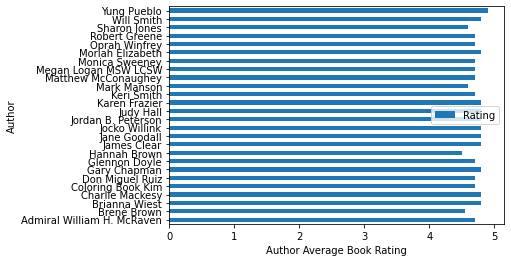

In [55]:
#Visualization: How will you visualize and explore your data?
#Below is a visulization of most popular author's books average ratings. I adapted this from exercise 9.

df.groupby('Author')['Rating'].mean().plot(kind='barh')
plt.xlabel('Author Average Book Rating')
plt.legend();


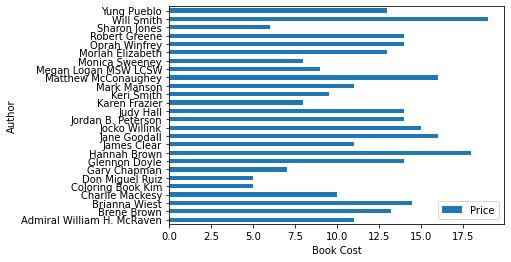

In [54]:
#Visualization: How will you visualize and explore your data?
#This visualizes what most popular author's books cost. This was also adpated from exercise nine.


df.groupby('Author')['Price'].mean().plot(kind='barh')
plt.xlabel('Book Cost')
plt.legend();


In [71]:
#Visualization: How will you visualize and explore your data?
#After a whole lot of failed attepts at trying to represent price and rating referenced though myplotlib I found an example similiar to what
#I had been trying to accomplish and it was done with Bokeh. Initially I had only imported a small section of the imports below, but though
#they worked in the exemplar I was modeling my work after it did not work for me. I then imported this big list because I was not really
#sure what I was lacking.
#I am honestly not sure which import made the difference, but this list led to the output I was aiming for.

from bokeh.models import ColumnDataSource
from bokeh.transform import dodge
import math
from bokeh.io import curdoc
curdoc().clear()
from bokeh.io import push_notebook, show, output_notebook
from bokeh.layouts import row
from bokeh.plotting import figure
from bokeh.transform import factor_cmap
from bokeh.models import Legend
from bokeh.transform import factor_cmap
from bokeh.models import Legend
from bokeh.palettes import Dark2_5 as palette
import itertools
from bokeh.palettes import d3
#colors has a list of colors which can be used in plots
colors = itertools.cycle(palette)

palette = d3['Category20'][20]

In [95]:
#Visualization: How will you visualize and explore your data?
#Here I am titling and labling my graph and setting the sizing.
#I have no idea why, but sometimes this graph launches and displays exactly how I want and other times it returns an error list a mile long.
#I change nothing, but I will run it once with errors, twice with errors, and the third time it launches without issue.
#I figured it out. I had the index_cmap lines of code running in another cell and they need to be reestablished everytime to relaunch the
#visual representation. I found every time I ran the prior cells first I could run this cell without error and narrowed it down to just the 
#prior cell. 
#The visualization looks good but I cannot get it to display within python and it will only display as a popup in my google browser. I
#remember the same thing happening in class, but I thought it also displayed within python.

index_cmap = factor_cmap('Author', palette=palette,
                         factors=data["Author"])

p = figure(plot_width=700, plot_height=700, title = "Top Authors: Rating vs. Price")
p.scatter('Rating','Price',source=data,fill_alpha=0.6, fill_color=index_cmap,size=20,legend='Author')
p.xaxis.axis_label = 'RATING'
p.yaxis.axis_label = 'Price'
p.legend.location = 'top_left'
show(p)

21    Admiral William H. McRaven
24                 Robert Greene
17                  Sharon Jones
29                 Glennon Doyle
Name: Author, dtype: object will be assigned to `nan_color` gray
